# Measure structures
* Measure .pdb structure files and output csv files
* Validate data
* Generate H atoms for solved structures

Notes:
* Needs dataset_measure.py to run

created 2024-12-16

In [1]:
import pathlib
import dataset_measure

structure_basePath = pathlib.Path("../ressources/ISS AF_DMI_structures").absolute()
structure_folders = [structure_basePath / p for p in ['AF_DMI_structures1', 'AF_DMI_structures2', 'AF_DMI_structures3']]
solved_basePath = pathlib.Path("../ressources/ISS DMI_solved_structures").absolute()
solvedHydrogen_basePath = pathlib.Path("../ressources/ISS DMI_solved_structures hydrogens").absolute()

pathObj = {}

In [35]:
def WalkFolder(basePath: str, 
               pathObj:dict[str, dict[str, pathlib.Path]]={},
               structures: None|str|list[str] = None,
               files: None|bool|str|list[str] = None
               ) -> dict[str, dict[str, pathlib.Path]]:
    """
        Add the path basePath/structure/file.pdb to the pathObj provided (or create a new one if omitted).
        If files and/or structures are None, search inside the directory for all pdb files.
        Returns:
            pathObj: dict[name:str, tuple[path: pathlib.Path, structure_name: str]]
    """

    structures_count = 0
    basePath = pathlib.Path(basePath).absolute()
    if not basePath.is_dir():
        raise ValueError("The given basePath is not a valid directory")
    
    if structures is None:
        structures: list[pathlib.Path] = [p for p in basePath.iterdir()]
    elif isinstance(structures, str):
        structures: list[pathlib.Path] = [basePath / structures]
    elif isinstance(structures, list):
        structures: list[pathlib.Path] = [basePath / p for p in structures]
    else:
        raise ValueError("Invalid argument for structures")

    for structure in structures:
        if not structure.exists():
            raise ValueError(f"The structure {structure} does not point to a valid path")
        structure_name = str(structure.name)
        if structure.is_file():
            if structure.suffix.lower() == ".pdb":
                structure_name = str(structure.stem)
                if structure_name in pathObj.keys():
                    raise ValueError(f"Duplicate structure and file {structure}")
                pathObj[structure_name] = (structure.absolute(), structure_name)
                structures_count += 1
            continue

        if files is None:
            filesF: list[pathlib.Path] = [f for f in structure.iterdir() if f.is_file()]
        elif isinstance(files, str):
            filesF: list[pathlib.Path] = [structure / f"{files}.pdb"]
        elif isinstance(files, list):
            filesF: list[pathlib.Path] = [structure / f"{f}.pdb" for f in files]
        else:
            raise ValueError("Invalid argument for files")
        
        for file in filesF:
            if not file.exists() or not file.is_file():
                raise ValueError(f"{structure}/{file} does not point to a valid file")
            if not file.suffix.lower() == ".pdb":
                continue
            file_name = file.stem
            name = f"{structure_name}-{file_name}"
            if name in pathObj.keys():
                raise ValueError(f"Duplicate structure and file {structure}/{file_name}.pdb")
            pathObj[name] = (file.absolute(), structure_name)
            structures_count += 1
    print(f"Found {structures_count} structures")
    return pathObj

In [36]:
pathObj = {}
for f in structure_folders:
    WalkFolder(f, pathObj)
print("Total structures:", len(pathObj))

Found 400 structures
Found 525 structures
Found 445 structures
Total structures: 1370


In [37]:
result = dataset_measure.Run(list(pathObj.values()), silent=False)
result

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9
...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528674,30


In [38]:
result.to_csv(pathlib.Path("output/af_structures.csv"), index=False)

In [40]:
pathObj = {}
WalkFolder(solvedHydrogen_basePath, pathObj)
print("Total structures:", len(pathObj))

Found 138 structures
Total structures: 138


In [5]:
result = dataset_measure.Run(list(pathObj.values()), silent=False)
result

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,1ATP_min_DMI,1ATP_min_DMI.pdb,1,0,872.216,6.273099,77
1,1AXC_min_DMI,1AXC_min_DMI.pdb,4,0,1276.554,4.173686,62
2,1B72_min_DMI,1B72_min_DMI.pdb,1,0,585.041,5.182325,36
3,1B8Q_min_DMI,1B8Q_min_DMI.pdb,4,0,928.705,4.376202,42
4,1BXX_min_DMI,1BXX_min_DMI.pdb,6,0,818.831,4.435122,19
...,...,...,...,...,...,...,...
133,5MLW_min_DMI,5MLW_min_DMI.pdb,2,0,1024.182,4.282367,114
134,5VZU_min_DMI,5VZU_min_DMI.pdb,4,0,877.551,4.959148,33
135,6FUZ_min_DMI,6FUZ_min_DMI.pdb,10,3,1123.307,5.531992,2
136,6G84_min_DMI,6G84_min_DMI.pdb,4,0,1254.304,5.521322,35


In [6]:
result.to_csv(pathlib.Path("output/solved_structures.csv"), index=False)

#### Validation
Validate if my generated data is equal to the data generated on ISS

In [24]:
import pandas as pd
import pathlib

In [41]:
issData = pd.read_csv(pathlib.Path("../ISS Code/output/structure_analysis_results_biopython_with_hydrophobic_and_final.csv"))
myData = pd.read_csv(pathlib.Path("output/af_structures.csv"))

In [42]:
issData

,prediction_name,structure_file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9
...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528673,30


In [44]:
myData

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9
...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528674,30


In [45]:
joinedData = pd.merge(
    left=myData, 
    right=issData,
    how='outer',
    left_on=['structure_name', 'file'],
    right_on=['prediction_name', 'structure_file'],
)
joinedData

,structure_name,file,hbonds_x,salt_bridges_x,buried_area_x,min_distance_x,hydrophobic_interactions_x,prediction_name,structure_file,hbonds_y,salt_bridges_y,buried_area_y,min_distance_y,hydrophobic_interactions_y
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,688.863,6.063404,0
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,648.414,6.083082,0
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,724.694,6.072073,3
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,450.095,5.417125,0
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,359.838,5.091792,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29,TRG_PTS1_2C0L,ranked_0.pdb,12,3,915.859,4.542064,29
1338,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29,TRG_PTS1_2C0L,ranked_1.pdb,11,3,933.190,4.558981,29
1339,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30,TRG_PTS1_2C0L,ranked_2.pdb,12,3,932.483,4.574167,30
1340,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528674,30,TRG_PTS1_2C0L,ranked_3.pdb,11,3,930.683,4.528673,30


In [56]:
column = "hbonds"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

,structure_name,file,hbonds_x,hbonds_y


In [57]:
column = "buried_area"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

,structure_name,file,buried_area_x,buried_area_y


In [58]:
# That one is ok, as there was an error in the original ISS code
column = "salt_bridges"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

,structure_name,file,salt_bridges_x,salt_bridges_y
9,DEG_COP1_1_5IGO,ranked_4.pdb,2,0
10,DEG_Kelch_Keap1_1_2FLU,ranked_0.pdb,11,0
11,DEG_Kelch_Keap1_1_2FLU,ranked_1.pdb,9,0
12,DEG_Kelch_Keap1_1_2FLU,ranked_2.pdb,11,0
13,DEG_Kelch_Keap1_1_2FLU,ranked_3.pdb,9,0
...,...,...,...,...
1325,TRG_LysEnd_GGAAcLL_1_1JWG,ranked_3.pdb,1,0
1327,TRG_NES_CRM1_1_3GB8,ranked_0.pdb,5,0
1328,TRG_NES_CRM1_1_3GB8,ranked_1.pdb,3,0
1329,TRG_NES_CRM1_1_3GB8,ranked_2.pdb,4,0


In [59]:
column = "min_distance"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

,structure_name,file,min_distance_x,min_distance_y
335,LIG_HOMEOBOX_1B72,ranked_0.pdb,11.646098,12.319908
336,LIG_HOMEOBOX_1B72,ranked_1.pdb,11.610141,0.000000
337,LIG_HOMEOBOX_1B72,ranked_2.pdb,11.893074,14.745695
338,LIG_HOMEOBOX_1B72,ranked_3.pdb,10.005889,10.803395
339,LIG_HOMEOBOX_1B72,ranked_4.pdb,18.050923,0.000000
393,LIG_LYPXL_S_1_2R03,ranked_2.pdb,68.863720,0.000000
394,LIG_LYPXL_S_1_2R03,ranked_3.pdb,22.638168,0.000000
395,LIG_LYPXL_S_1_2R03,ranked_4.pdb,83.210614,0.000000
666,MDEG_SPOP_SBC_1_3HQM.DDOC_MIT_MIM_1_2JQ9,ranked_4.pdb,17.805032,0.000000
767,MDOC_USP7_UBL2_3_4YOC.DTRG_ER_FFAT_1_2RR3,ranked_0.pdb,8.262786,8.353945


In [60]:
column = "hydrophobic_interactions"
divergingRows = joinedData.query(f"({column}_x - {column}_y)**2 >= 0.001")
divergingRows[["structure_name", "file", f"{column}_x",f"{column}_y"]]

,structure_name,file,hydrophobic_interactions_x,hydrophobic_interactions_y


### Adding H to solved structures

Visualizing if H is currently present

In [16]:
import biotite.structure.io as biotiteIO
import biotite.structure as struc
import matplotlib.pyplot as plt

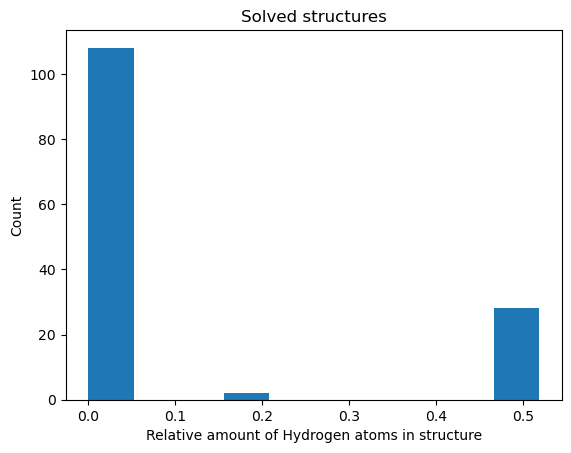

In [22]:
structures = {}
for path in solved_basePath.iterdir():
    if not path.is_file() and path.suffix.lower() == ".pdb":
        continue
    structure_name = path.stem
    structures[structure_name] = biotiteIO.pdb.get_structure(biotiteIO.pdb.PDBFile.read(path))

hydrogens_rel = {}
for name, structure in structures.items():
    if len(structure) != 1:
        raise ValueError("Multiple structures")
    s = structure[0]
    count = len(s)
    h_count = len(s[(s.element == "H")])
    hydrogens_rel[name] = h_count/count

dist = [r for name,r in hydrogens_rel.items()]
plt.hist(dist)
plt.title("Solved structures")
plt.ylabel("Count")
plt.xlabel("Relative amount of Hydrogen atoms in structure")
plt.show()

In [19]:
import pymol
exportPath = solved_basePath / ".." / "ISS DMI_solved_structures hydrogens"

In [ ]:
for path in solved_basePath.iterdir():
    if not path.is_file() and path.suffix.lower() == ".pdb":
        continue
    print(path.stem)
    pymol.cmd.load(path, path.stem)
    pymol.cmd.h_add()
    pymol.cmd.save(exportPath / path.name)
    pymol.cmd.delete(path.stem)

Visualizing the exported data

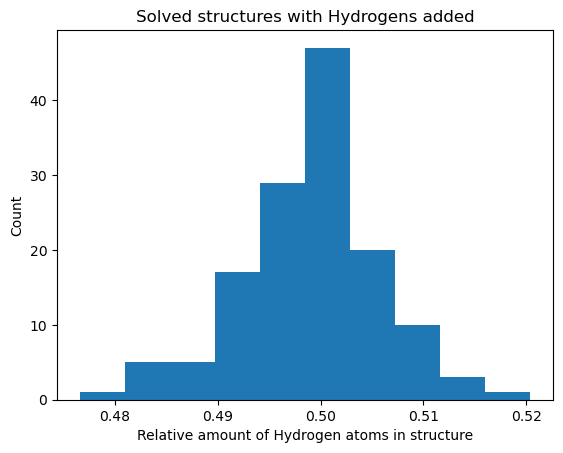

In [23]:
structures = {}
for path in exportPath.iterdir():
    if not path.is_file() and path.suffix.lower() == ".pdb":
        continue
    structure_name = path.stem
    structures[structure_name] = biotiteIO.pdb.get_structure(biotiteIO.pdb.PDBFile.read(path))

hydrogens_rel = {}
for name, structure in structures.items():
    if len(structure) != 1:
        raise ValueError("Multiple structures")
    s = structure[0]
    count = len(s)
    h_count = len(s[(s.element == "H")])
    hydrogens_rel[name] = h_count/count

dist = [r for name,r in hydrogens_rel.items()]
plt.hist(dist)
plt.title("Solved structures with Hydrogens added")
plt.ylabel("Count")
plt.xlabel("Relative amount of Hydrogen atoms in structure")
plt.show()